In [1]:
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from multiprocessing import Pool
import random
import timeit
import copy
import pandas as pd
import warnings
import scipy.integrate as integrate
warnings.filterwarnings('ignore')
import sys,os
sys.path.append(os.path.abspath("../"))
from LBL_funcs_waterRTM import *
import re

## extract file

In [2]:
def calculateF(res,nu):
    F_gas = res.item().get('F_n_abs')
    N_layer = F_gas.shape[0]
    F_total = 0
    items1 = ['F_n_abs', 'F_n_abs_rights','F_n_abs_leftn','F_n_abs_fronte','F_n_abs_backw']
    for item in items1:
        temp = res.item().get(item)
        F_i = integrate.trapz(temp, nu, axis=1)
        F_total += np.sum(F_i)
    F_1stLayer = res.item().get("F_n_abs")[-2]
    F_body = res.item().get("F_n_abs")[1:-2]
    F_edge = res.item().get('F_n_abs_rights') + res.item().get('F_n_abs_leftn') \
             + res.item().get('F_n_abs_fronte') + res.item().get('F_n_abs_backw')
    F_bottom= res.item().get('F_n_abs')[0]
    F_dw = res.item().get('F_n_dw')
    F_uw = res.item().get('F_n_uw')
    return F_total, F_bottom, F_1stLayer, F_body, F_edge, F_dw, F_uw

In [3]:
# 1. Tmperature extracted from file name
Temp = []
Angle = []
for string in Fls:
    match = re.search(r'([\d.]+)_results', string)
    if match:
        Temp.append(int(match.group(1)))

    match = re.search(r'_([\d.]+)theta', string)
    if match:
        Angle.append(int(match.group(1)))
df1 = pd.DataFrame({"Temp":Temp, "Angle":Angle})

# 2. extract all kinds of energy and save it as pandas
# allocate a empty dataframe
df2 = pd.DataFrame(columns=["F_total","F_bottom","F_1stLayer","F_body","F_edge","F_dw","F_uw"])
for i in range(len(Fls)):
    res = np.load(path + Fls[i], allow_pickle=True)
    columns = ["F_total", "F_bottom", "F_1stLayer", "F_body", "F_edge", "F_dw", "F_uw"]
    values = calculateF(res, nu)
    df2.loc[i, columns] = values
dataf = pd.concat([df1, df2], axis=1)
del df1, df2

df = dataf.sort_values(by='Temp')

NameError: name 'Fls' is not defined

## Body absorption rate

In [186]:
body = df["F_body"][0]
b = np.sum(body, axis=0)
b1 = df["F_1stLayer"][0]

In [187]:
df

,Temp,Angle,F_total,F_bottom,F_1stLayer,F_body,F_edge,F_dw,F_uw
80,300,70,396.635885,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.1951923548359725e-06, 0.0001985011802565192...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
74,300,45,448.715488,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.938343843315403e-06, 0.00021262051106974442...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17,300,0,459.299628,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.783288227896052e-06, 0.00027684962378872973...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36,300,80,294.193669,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.39755784876127e-06, 0.00016001908254988578,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
27,300,30,451.469899,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.697061908250625e-06, 0.0002095751652080684,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
82,5800,60,58321295.65622,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.586226541349484e-05, 0.004129292123942624, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
46,5800,0,61988013.086981,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015081961314810107, 0.005426139453275459,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
47,5800,45,60279136.59655,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.631472425293913e-05, 0.004167275100115553, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
77,5800,85,25885749.791218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.797373999756825e-05, 0.002208438757483112, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


### 4. Validation theoretical v.s. model

model - theoretical in terms of:

    1. absorbed by depth
    
    2. absorbed by degree
    
    3. absorbed by temperature
    
    4. ground reflectance
    

the water absorbed R = k_ab * depth * 1


the water scatter R = k_s * depth * 1

In [6]:
i = -3
data = df.iloc[i]
data

Temp                                                       5800
Angle                                                        45
F_total                                          60279136.59655
F_bottom      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
F_1stLayer    [7.631472425293913e-05, 0.004167275100115553, ...
F_body        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
F_edge        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
F_dw          [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
F_uw          [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: 47, dtype: object

In [7]:
a = data["F_dw"][-1]  # incident total energy
lay1st = data["F_1stLayer"][0]
body = data["F_body"]
body_abs = np.sum(body,axis=0)  # integrate layers, left wavenumber

#### import coeff

In [8]:
from LBL_funcs_waterRTM import *
N_layer = 200
path = "../"
spectral="full spectrum"
pond_type = 'homogeneous'  # 'gradiant'

ka_lq_M, ks_lq_M = getMixKappa(N_layer, nu, path, spectral, pond_type, 35, 20)
ke_M = ka_lq_M + ks_lq_M  # cm-1
rho_mix_M = ks_lq_M/ke_M

In [9]:
D= 50 # 0.5m
tau = np.exp(-ka_lq_M[0]* D)
# ground reflection
# alpha_s_g=surface_albedo(nu, 'soil', path)
# t*alpha_s_g  # the ground reflected

In [11]:
# T= 5800
i = -3 # 45 degree
j = -4 # 0 degree
datai = df.iloc[i]
dataj = df.iloc[j]
E_ii = datai["F_dw"][-1]  # incident total energy
E_ij = dataj["F_dw"][-1]  # incident total energy
lay1st_i = datai["F_1stLayer"]
lay1st_j = dataj["F_1stLayer"]
body_i = datai["F_body"][-49:-1,:]
body_j = dataj["F_body"][-49:-1,:]
body_abs_i = np.sum(body_i,axis=0)  # integrate layers, left wavenumber
body_abs_j = np.sum(body_j,axis=0)

abs_i = (body_abs_i+lay1st_i)/E_ii
abs_j = (body_abs_j+lay1st_j)/E_ij

# the theoritical absorption rate
#ka = 1- np.exp(-ka_lq_M[0]*50)
rj = 1 - np.exp(-ka_lq_M[0]*50)  # cm
depth2 = 50/np.cos(45/180*np.pi)
ri = 1 - np.exp(-ka_lq_M[0]*depth2)

In [12]:
datai["F_body"][-49:-1,:].shape

(48, 6668)

In [13]:
font=15
fontfml='Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

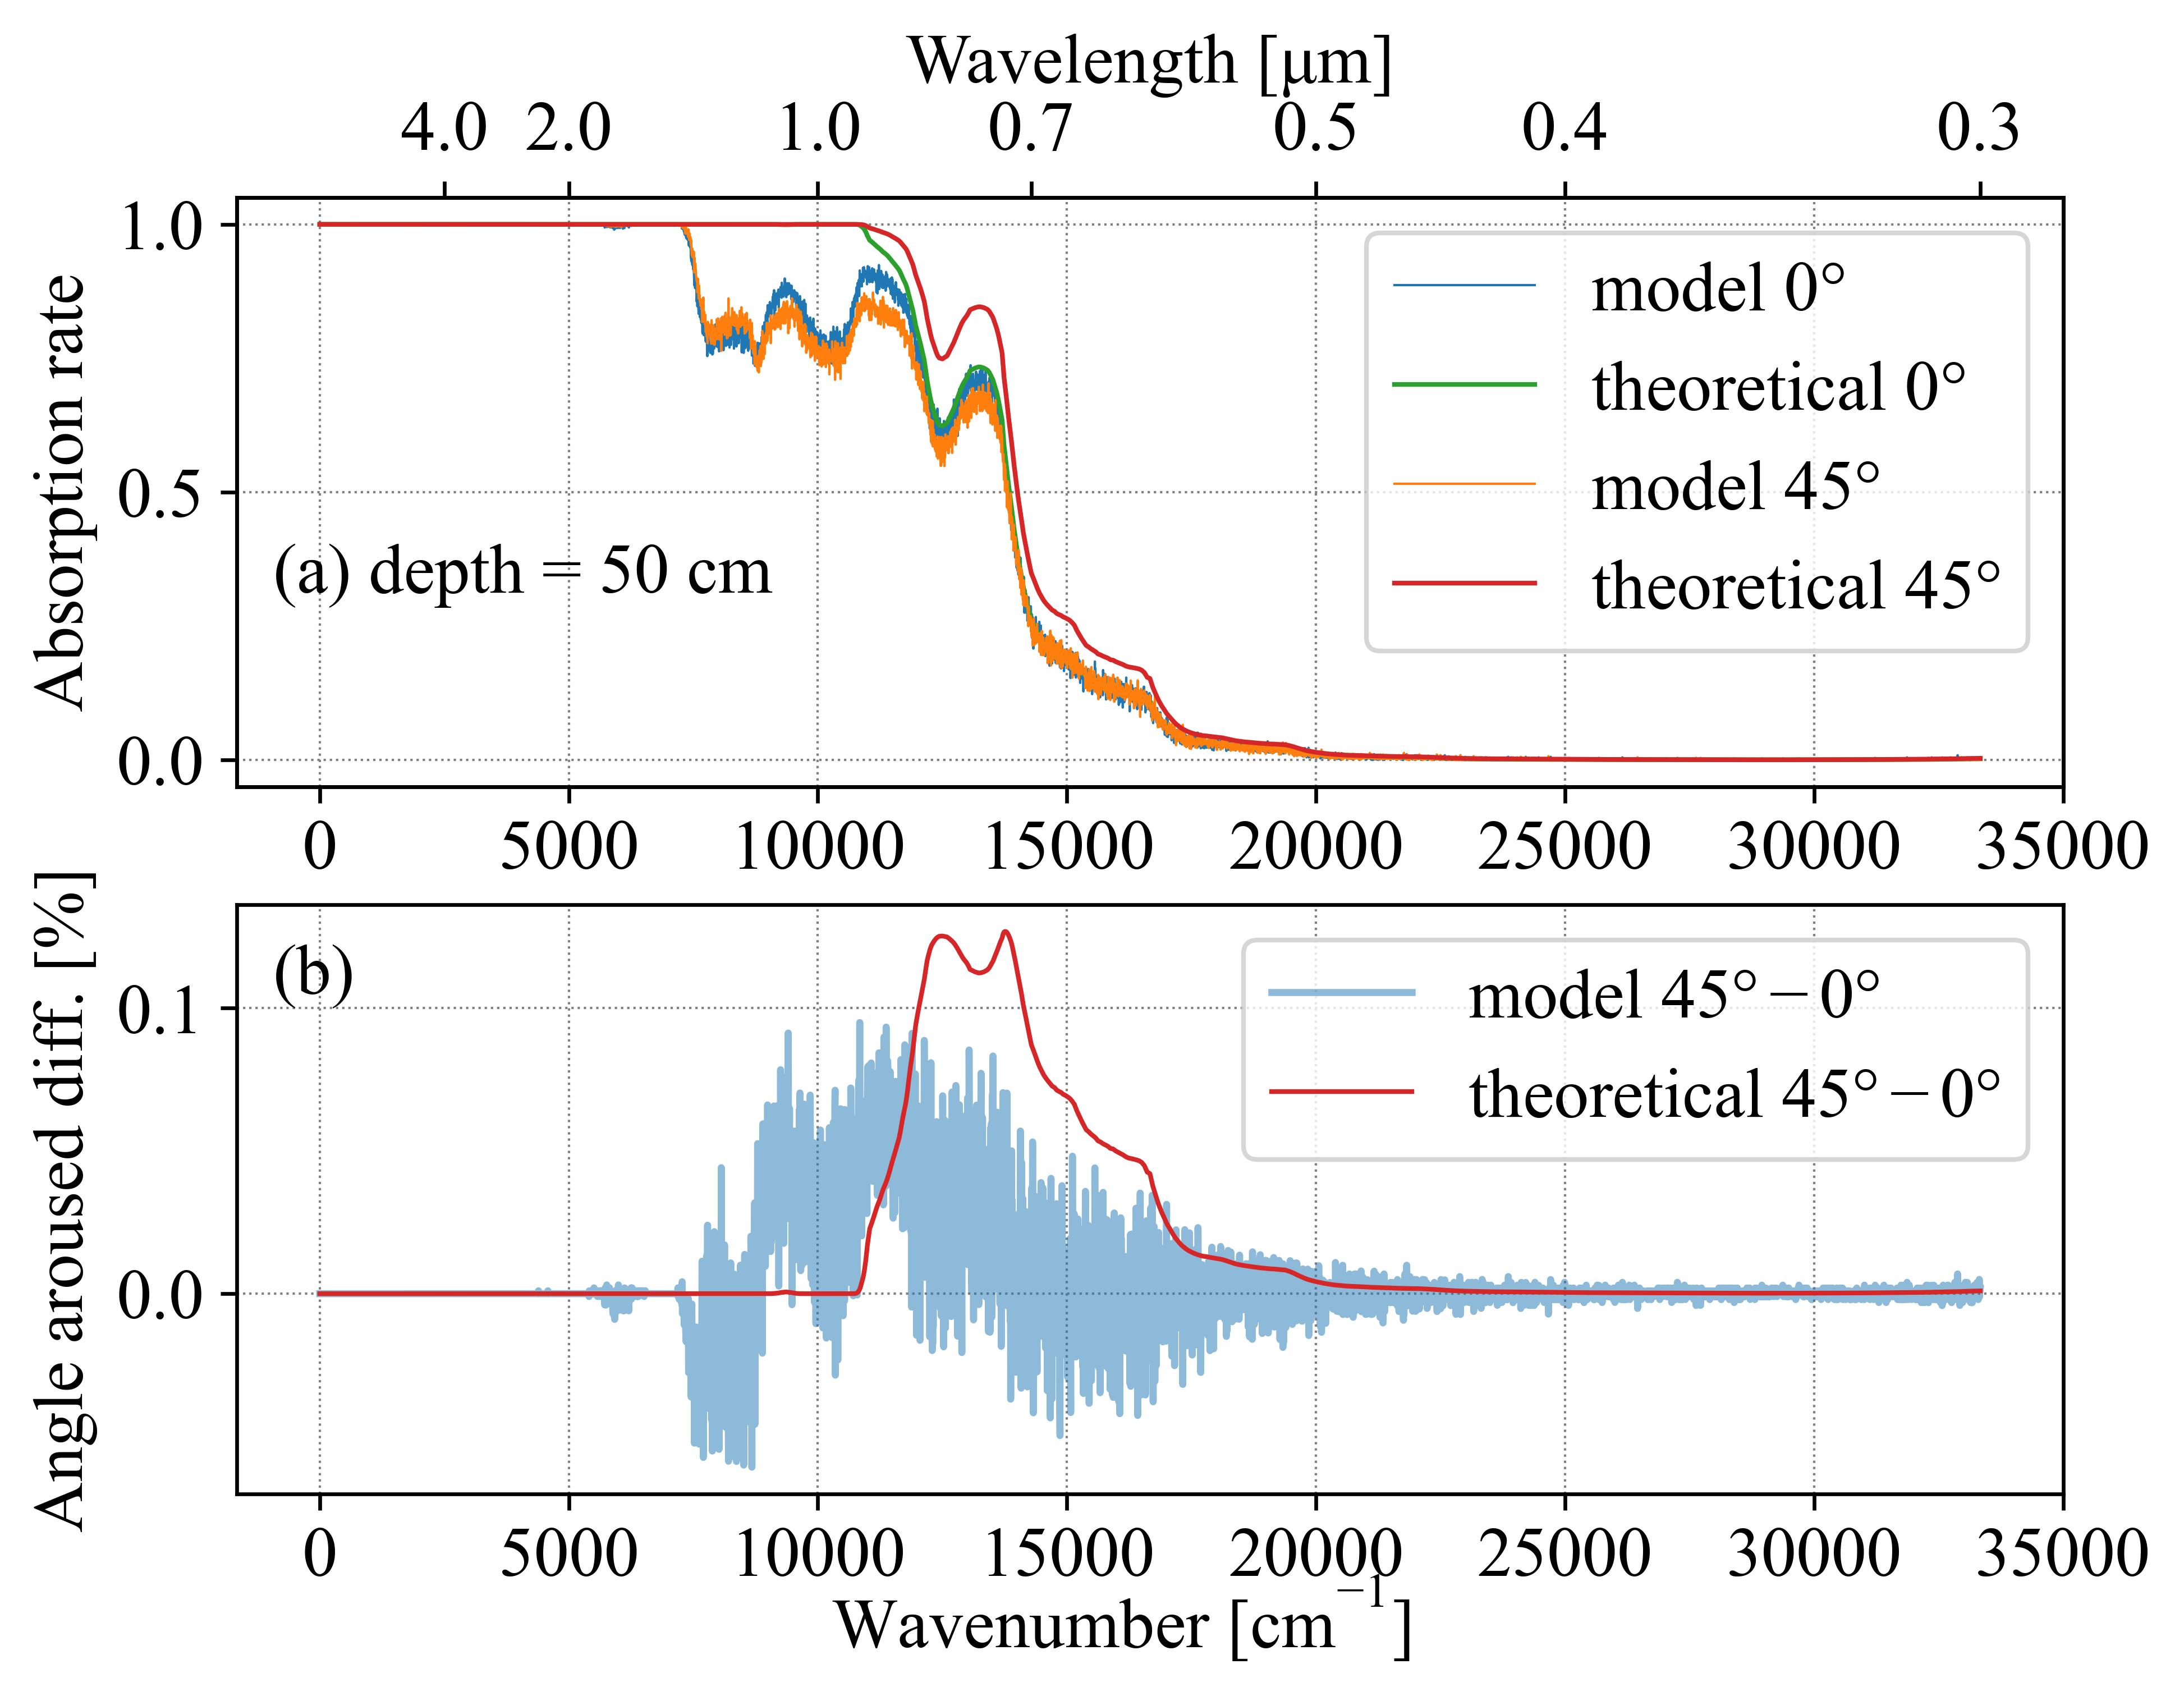

In [14]:
import os, sys
sys.path.append(os.path.abspath("../test/"))
from DrLi_gorgeous_plotlib import *
b_lims=np.array([2500,5000, 10000, 14285, 20000, 25000, 33333])

fig, axs = plt.subplots(2,1,figsize=(7,5),dpi=600)
font=15
fontfml='Times New Roman'

ax1 = axs[0]
ax2 = axs[1]

ax1.plot(nu, abs_j, label=r"model 0$\degree$",color="C0",linewidth=0.5)
ax1.plot(nu, rj, label=r"theoretical 0$\degree$",color="C2",linewidth=1)
ax1.plot(nu, abs_i, label=r"model 45$\degree$",color="C1",linewidth=0.5)
ax1.plot(nu, ri, label=r"theoretical 45$\degree$",color="C3",linewidth=1)
ax1.set_ylabel(r"Absorption rate")
ax1.legend(loc="upper right")
ax1.grid(True)
ax1.grid(color='grey', linestyle=':', linewidth=0.5)
ax1.text(0.02, 0.33, '(a) depth = 50 cm', transform=ax1.transAxes, fontsize=font, family=fontfml)

ax2.plot(nu, abs_j-abs_i, label=r"model 45$\degree- $0$\degree$",color="C0",alpha=0.5)
ax2.plot(nu, ri-rj, label=r"theoretical 45$\degree-$0$\degree$",color="C3",linewidth=1)
ax2.grid(True)
ax2.grid(color='grey', linestyle=':', linewidth=0.5)
ax2.legend()
ax2.set_ylabel(r"Angle aroused diff. [%]")
#ax2.set_xlabel(r"wavelength [cm$^{-1}$]")
ax2.legend(loc="upper right")
ax2.text(0.02, 0.85, '(b)', transform=ax2.transAxes, fontsize=font, family=fontfml)

# add another x-axis for wavelength
new_tick_locations = b_lims
ax3=lambda_axis(ax1,new_tick_locations,font,fontfml,True)
ax3.set_xlabel('Wavelength [μm]',fontsize=font,family=fontfml)
fig.supxlabel('Wavenumber [cm$^{-1}$]',fontsize=font,family=fontfml)

fig_dir = "../figure/"
#fig.savefig(fig_dir+'varif.png', dpi=300, bbox_inches='tight')#,transparent=True)
plt.show()

the incident angle at 0 $\degree$, the scattering and reflection will contribution more absorption, and this amount of absorption is 

## A. Angle's impact to the water received

In [188]:
df

,Temp,Angle,F_total,F_bottom,F_1stLayer,F_body,F_edge,F_dw,F_uw
80,300,70,396.635885,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.1951923548359725e-06, 0.0001985011802565192...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
74,300,45,448.715488,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.938343843315403e-06, 0.00021262051106974442...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
17,300,0,459.299628,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.783288227896052e-06, 0.00027684962378872973...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36,300,80,294.193669,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.39755784876127e-06, 0.00016001908254988578,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
27,300,30,451.469899,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.697061908250625e-06, 0.0002095751652080684,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
82,5800,60,58321295.65622,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.586226541349484e-05, 0.004129292123942624, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
46,5800,0,61988013.086981,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00015081961314810107, 0.005426139453275459,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
47,5800,45,60279136.59655,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.631472425293913e-05, 0.004167275100115553, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
77,5800,85,25885749.791218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.797373999756825e-05, 0.002208438757483112, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


### k-coeff, k

In [189]:
k_abs = 1-np.exp(-ka_lq_M[0]*30)

i=5 ## T = 5800, angle = 0
in_E = df["F_dw"][i][-1]

g = in_E/np.sum(in_E)
N = k_abs.shape[0]
k_ave = np.sum(k_abs*g)

ValueError: operands could not be broadcast together with shapes (6168,) (6668,) 

In [ ]:
def cal_kave(Fdw,k_abs):
    """
    calculate the k_ave of each line
    """
    in_E = Fdw[-1]
    g = in_E/np.sum(in_E)
    N = k_abs.shape[0]
    k_ave = np.sum(k_abs*g)
    return k_ave

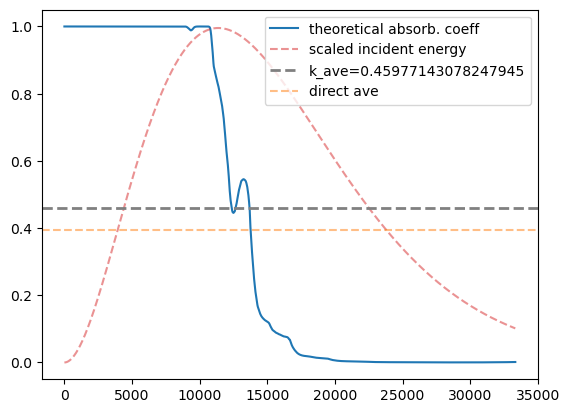

In [117]:
plt.plot(nu,k_abs,label="theoretical absorb. coeff")
plt.plot(nu,in_E/3500,linestyle='--', color="C3",label="scaled incident energy",alpha=0.5)
plt.axhline(k_ave, color='gray', linestyle='--',linewidth=2, label=f"k_ave={k_ave}")
plt.axhline(np.mean(k_abs), color='C1', linestyle='--',linewidth=1.5, label="direct ave",alpha=0.5)
plt.legend()
plt.show()

# theoritical total solar transmittance

In [4]:
import scipy.integrate as integrate
def solar_flux(a):
    data = np.genfromtxt('./data/profiles/ASTMG173.csv', delimiter=',', skip_header=1,  # in wavenumber basis
                         names=['wavelength', 'column2', 'column3', '37d_irrdiance'])
    nu = np.arange(2500,33333+5,5)  # cm-1
    ref_lam = data['wavelength'][1:]  # nm
    ref_E = data['37d_irrdiance'][1:]  # Direct+circumsolar W/[m2*nm]
    ref_E_nu=-ref_E*ref_lam**2/1e7  # W/[m2*nm-1] to W/[m2*cm-1]
    F_dw_os = -np.interp(-nu, -1e7/ref_lam, ref_E_nu)  # W/[m2*cm-1] 
    F_total = integrate.trapz(F_dw_os,nu)
    
    return nu, F_dw_os, F_total
nu, F_dw_os, F_total = solar_flux('hi')

In [5]:
from LBL_funcs_waterRTM import *
N_layer = 200
path = "./"
spectral="SW"
pond_type = 'homogeneous'  # 'gradiant'

ka_lq_M, ks_lq_M = getMixKappa(N_layer, nu, path, spectral, pond_type, 35, 20)
ke_M = ka_lq_M + ks_lq_M  # cm-1
rho_mix_M = ks_lq_M/ke_M

In [ ]:
# import 2004 model data
import pandas as pd
filename = "validation2004data"+".csv"
df = pd.read_csv(filename,header=None, names=['depth', 'trans'])
df['depth']=df['depth'][::-1]
#df['trans'] = df['trans'][::-1]
df

In [389]:
## formulations in 2004 paper
L = 3 # m
a0 = 0.5445
a1 = -0.2323
a2 = 0.0606
a3 = -0.0022
a4 = -0.0008
rho = 0
angle = 0
Lcos = L * np.cos(angle*180/np.pi)
x = np.arange(0.01,3,0.01) 

# formulation :  net radiation
tn = a0+a1*(x/Lcos)+a2*(x/Lcos)**2+a3*(x/Lcos)**3+a4*(x/Lcos)**4
# the downwarding radiation
t=0.36-0.08*np.log(x/np.cos(angle*180/np.pi))

### 1. import RTM model output data

In [11]:
## theoretical validation using formulas.
# D = np.arange(50,300+50,50) # 0.5m
# Transmittance = [] 
# import scipy.integrate as integrate
# for i in range(D.shape[0]):
#     tau = np.exp(-ka_lq_M[0]* D[i])
#     F_temp = integrate.trapz(F_dw_os*tau,nu)
#     t = F_temp/F_total
#     Transmittance.append(t)

### 2. Solar model in my paper

In [350]:
x = 0.24 #np.arange(0,0.24+0.05,0.05)
# lambda > 1
alpha1 = 1 - np.exp(-30.2*x-1.05)-0.01
# lambda <= 1
alpha2 = 1 - np.exp(-3.67*x-1.17)-0.63

In [351]:
p_nu = 1500
nu, F_dw_os = solar_flux('hi')
f1 = integrate.trapz(F_dw_os[:p_nu],nu[:p_nu])/I1
f2 = integrate.trapz(F_dw_os[p_nu:],nu[p_nu:])/I1
rtm_solar = alpha1*f1 + alpha2*f2

### 3. existing other data

In [ ]:
path = "./solarangle/"
Fls = os.listdir(path)
Fls = [s for s in Fls if s.endswith('_0theta.npy')]
Fls

In [100]:
res = np.load(path+'/'+Fls[-1], allow_pickle=True)
#res.item().keys()

#n_sca = res.item().get('F_n_sca')
#np.sum(n_sca, axis=1)[-1]
Fabs = res.item().get('F_n_abs')
Abs = integrate.trapz(Fabs[1:], nu)/F_total
print(np.sum(Abs))

Fdw = res.item().get('F_n_dw')
exp_fdw = integrate.trapz(Fdw, nu)/F_total

Fuw = res.item().get('F_n_uw')
exp_fuw = integrate.trapz(Fuw, nu)/F_total
exp_D= np.arange(0,300+1,1)[::-1] # 0.5m
net_flux = exp_fdw - exp_fuw

0.5407343181474793


# pic for validation

In [195]:
import matplotlib.gridspec as gridspec
from matplotlib import cm #color map
from matplotlib.ticker import FormatStrFormatter # set decimals in ticks
from matplotlib import rc

font=15
fontfml='Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
#plt.rcParams['text.usetex'] = True

### 1984

In [8]:
F_total

900.1446337433081

In [9]:
# incident radiation
vm = np.array([0.300,0.409,0.453,0.487,0.522,0.558,0.594,0.632,0.670,0.710,
0.752,0.802,0.854,0.909,0.994,1.063,1.173,1.277,1.564,1.948,5.000])

midvm =  np.array([0.374,0.432,0.470,0.504,0.540,0.577,0.612,0.651,0.689,
                  0.732,0.778,0.827,0.881,0.954,1.025,1.103,1.220,1.451,\
                  1.662,2.283])

kcoeff = np.array([1.22e-01, 3.56e-02, 2.55e-02, 2.61e-02, 3.95e-02, 9.06e-02,
               2.52e-01, 3.21e-01, 5.19e-01, 1.83e+00, 2.35e+00, 2.89, 5.90e+00,
               3.98e+01, 4.47e+01, 7.10e+01, 2.17e+02, 1.10e+03, 7.12e+02,
               3.04e+03])

In [164]:
#path = "../temp/"
path = "./validation1984/"
#path = "./SolarAngle/"
Fls = os.listdir(path)
Fls = [s for s in Fls if s.endswith('.npy')]
depth = 2 * 100
Fls = np.sort(Fls)
#Fls=Fls[:-1]
Fls

array(['SW_results_200layer_1000bundle_0theta_0.7alpha.npy',
       'SW_results_200layer_1000bundle_15theta_0.7alpha.npy',
       'SW_results_200layer_1000bundle_30theta_0.7alpha.npy',
       'SW_results_200layer_1000bundle_45theta_0.7alpha.npy',
       'SW_results_200layer_1000bundle_60theta_0.7alpha.npy',
       'SW_results_200layer_1000bundle_75theta_0.7alpha.npy'],
      dtype='<U51')

In [165]:
nu = 1/midvm*1e4
nu = nu[::-1]

In [160]:
#nu = np.arange(2500,33333+5,5)  # cm-1
import scipy.integrate as integrate
BODY = []
BOTTOM = []
REFLEC = []

for i in range(len(Fls)):
    res = np.load(path+'/'+Fls[i], allow_pickle=True)
    #print(Fls[i][-11:-9])
    print(Fls[i][-20:-18])
    res.item().keys()

    n_sca = res.item().get('F_n_sca')
    sca = integrate.trapz(n_sca[-1], nu)/F_total
    print(f"out of water: {sca}")
    Fabs = res.item().get('F_n_abs')  # 0 is bottom
    Abs = integrate.trapz(Fabs[1:], nu)/F_total
    print(f"water body: {np.sum(Abs)}")
    BODY.append(np.sum(Abs))

    bottom = integrate.trapz(Fabs[0], nu)/F_total
    F_edge = res.item().get('F_n_abs_rights') + res.item().get('F_n_abs_leftn') \
                 + res.item().get('F_n_abs_fronte') + res.item().get('F_n_abs_backw')
    edge = np.sum(integrate.trapz(F_edge, nu)/F_total)
    #print(f"edge:{edge}")
    print(f"water bottom: {bottom+edge}")
    BOTTOM.append(bottom+edge)

    Fdw = res.item().get('F_n_dw')
    exp_fdw = integrate.trapz(Fdw, nu)/F_total
    print(f"reflectivity:{1-exp_fdw[-1]+sca}")
    REFLEC.append(1-exp_fdw[-1]+sca)

    Fuw = res.item().get('F_n_uw')
    exp_fuw = integrate.trapz(Fuw, nu)/F_total
    exp_D= np.arange(0,depth+1,1)[::-1] # 0.5m
    net_flux = exp_fdw - exp_fuw

_0
out of water: 0.029758698704898036
water body: 0.6708406683612697
water bottom: 0.2686295224844219
reflectivity:0.0469226229798562
15
out of water: 0.028742224513671248
water body: 0.6555163947508215
water bottom: 0.2644065026078686
reflectivity:0.06414340080306369
30
out of water: 0.030441298447569695
water body: 0.6577019116248775
water bottom: 0.26523318437911164
reflectivity:0.06549643034430129
45
out of water: 0.030356136962746364
water body: 0.6559595145334238
water bottom: 0.2606732753785882
reflectivity:0.0735097964656391
60
out of water: 0.028016936696918255
water body: 0.6400483672432811
water bottom: 0.2467764236549791
reflectivity:0.10514038431348434
75
out of water: 0.024591736348046594
water body: 0.5412413277284612
water bottom: 0.1995701461354471
reflectivity:0.25158259695105334


In [161]:
# rho=0.0 blackbottom
# exp_bott = [33.8,  33.6, 33.1, 32.1, 30.1, 24.5, 30.8]
# exp_water = [64.2, 64.4, 64.8, 65.1, 63.9, 54.3, 62.6]
# exp_reflec = [6.6, 6.6,  6.6,  7.2,  10.1, 24.7, 6.6]
angle1 = [0,15,30,45,60,75]
# rho=0.3
exp_bott = [25.5,  25.4, 25.0, 24.3, 22.8, 18.6]
exp_water = [67.9, 68.0, 68.4, 68.5, 67.1, 56.8]
exp_reflec = [6.6, 6.6,  6.6,  7.2,  10.1, 24.7]
angle = [0,15,30,45,60,75]

In [162]:
np.sum(exp_bott+exp_water+exp_reflec)/600

1.0001666666666666

Body
mse=0.0006458318298584971
rmse=0.02541322155608173
Reflection
mse=6.801155323195382e-05
rmse=0.008246911739066559
Bottom
mse=0.0002291927833375013
rmse=0.015139114351160088


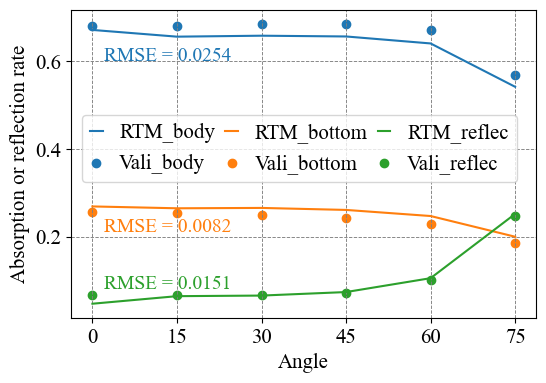

In [198]:
fig = plt.figure(figsize=(6, 4))
font=14
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1, 1)  # a grid with 1 row and 1 column
gs1.update(wspace=0.07, hspace=0.10) # set the spacing between axes.
ax = fig.add_subplot(gs1[0])

ax.plot(angle1, np.array(BODY), color = "C0", label = "RTM_body")
ax.scatter(angle, np.array(exp_water)/100,color = "C0", label = "Vali_body")

ax.plot(angle1, np.array(BOTTOM), color = "C1", label = "RTM_bottom")
ax.scatter(angle, np.array(exp_bott)/100,color = "C1", label = "Vali_bottom")

plt.plot(angle1, np.array(REFLEC), color = "C2", label = "RTM_reflec")
plt.scatter(angle, np.array(exp_reflec)/100, color = "C2", label = "Vali_reflec")
plt.legend(loc = "center left", ncol=3, handlelength=0.6,columnspacing=0.5, bbox_to_anchor=(0.0, 0.55))
ax.set_ylabel("Absorption or reflection rate")
ax.set_xlabel("Angle")
ax.set_xticks([0,15,30,45,60,68,75])
ax.set_xticklabels([0,15,30,45,60,'diffuse',75])
ax.set_xticks(angle)
plt.grid(color='grey', linestyle='--', linewidth=0.65)

from sklearn.metrics import mean_squared_error
# x1,y1 = angle+angle+angle, np.array(BODY+BOTTOM+REFLEC),
# x2,y2 = angle+angle+angle, np.array(exp_bott+exp_water+exp_reflec)/100

def rmse_cal(y1,y2):
    mse = mean_squared_error(y1,y2)
    rmse = np.sqrt(mse)
    print(f"mse={mse}")
    print(f"rmse={rmse}")
    return mse, rmse

# dataset 0 to 1, RMSE of 0.05 might be considered good.
print('Body')
mse, rmse = rmse_cal(BODY, np.array(exp_water)/100)
ax.annotate(f'RMSE = {rmse:.4f}', xy=(2,0.6),color="C0",fontsize=font,family=fontfml)
print('Reflection')
mse, rmse = rmse_cal(REFLEC, np.array(exp_reflec)/100)
ax.annotate(f'RMSE = {rmse:.4f}', xy=(2,0.21),color="C1",fontsize=font,family=fontfml)
print('Bottom')
mse, rmse = rmse_cal(BOTTOM, np.array(exp_bott)/100)
ax.annotate(f'RMSE = {rmse:.4f}', xy=(2,0.08),color="C2",fontsize=font,family=fontfml)

#plt.title(f"RMSE = {rmse:.4f}")

fig_dir = './../figure/'
plt.savefig("validation.png",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

### 2004

In [34]:
#path = "../temp/"
path = "./validation1984/"
#path = "./solarangle/"
Fls = os.listdir(path)
Fls = [s for s in Fls if s.endswith('.npy')]
depth = 2 * 100
Fls

Fls = np.sort(Fls)

import scipy.integrate as integrate
BODY = []
BOTTOM = []
REFLEC = []

for i in range(len(Fls)):
    res = np.load(path+'/'+Fls[i], allow_pickle=True)
    print(Fls[i][-20:-18])
    res.item().keys()

    n_sca = res.item().get('F_n_sca')
    sca = integrate.trapz(n_sca[-1], nu)/F_total
    #print(f"out of water: {sca}")
    Fabs = res.item().get('F_n_abs')  # 0 is bottom
    Abs = integrate.trapz(Fabs[1:], nu)/F_total
    print(f"water body: {np.sum(Abs)}")
    BODY.append(np.sum(Abs))

    bottom = integrate.trapz(Fabs[0], nu)/F_total
    F_edge = res.item().get('F_n_abs_rights') + res.item().get('F_n_abs_leftn') \
                 + res.item().get('F_n_abs_fronte') + res.item().get('F_n_abs_backw')
    edge = np.sum(integrate.trapz(F_edge, nu)/F_total)
    #print(f"edge:{edge}")
    print(f"water bottom: {bottom+edge}")
    BOTTOM.append(bottom+edge)

    Fdw = res.item().get('F_n_dw')
    exp_fdw = integrate.trapz(Fdw, nu)/F_total
    print(f"reflectivity:{100-exp_fdw[-1]}")
    REFLEC.append(100-exp_fdw[-1]+sca)

    Fuw = res.item().get('F_n_uw')
    exp_fuw = integrate.trapz(Fuw, nu)/F_total
    exp_D= np.arange(0,depth+1,1)[::-1] # 0.5m
    net_flux = exp_fdw - exp_fuw

FileNotFoundError: [Errno 2] No such file or directory: './validation1984/'

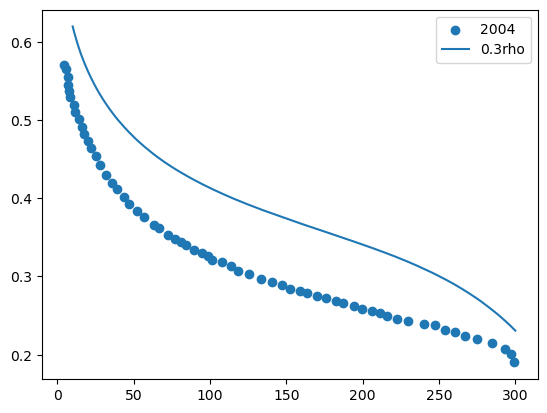

In [ ]:
# theoratical formular data
# plt.scatter(D,Transmittance,s=15,color='C1',label="2004")
plt.scatter(df['depth']*100,df['trans'],label="2004")
#plt.scatter(exp_D[:-1],t[::-1],label="2004_model_dw")#
#plt.plot(exp_D,exp_trans[1:],label="RTM_model")
plt.plot(exp_D[:-10],net_flux[1:-10],label="0.3rho")
#plt.plot(D[:-10],net_flux_b[1:-10],label="black")
plt.legend()
plt.show()

In [27]:
net_flux_b = net_flux 
D = exp_D

In [155]:
from sklearn.metrics import mean_squared_error
x1,y1 = df['depth'].values[::-1]*100,df['trans'].values[::-1]
x2,y2 = exp_D[:-10],net_flux[1:-10]
mse = mean_squared_error(y1, np.interp(x1, x2, y2))
print(f"mse={mse}"
# dataset 0 to 1, RMSE of 0.05 might be considered good.
rmse = np.sqrt(mse)
rmse

0.09483065672574618

In [156]:
rmse = np.sqrt(mse)
print(f"rmse={rmse/100}")

0.30794586655083744

In [170]:
from scipy.stats import ks_2samp
x1,y1 = df['depth'].values[::-1]*100,np.diff(df['trans'].values[::-1])
x2,y2 = exp_D, np.diff(net_flux[1:])
ks_statistic, ks_pvalue = ks_2samp(y1, np.interp(x1[1:], x2[1:-10], y2[:-10]))
ks_pvalue

6.867313229040229e-08

In [171]:
ks_statistic

0.5161290322580645

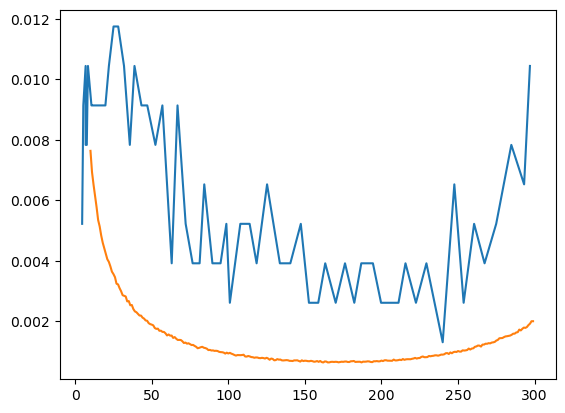

In [172]:
plt.plot(x1[1:],y1)
plt.plot(x2[1:-10],y2[:-10])
plt.show()

### 2009

In [276]:
import math
import datetime

# 3m，3m，0.24 m
# May 7 of 2008
temp = datetime.date(2008, 4, 12)
doy = temp.timetuple().tm_yday
lat= 25.01
def cal_zenith(LST,day_of_year,lat):  
    # latitude
    lat = math.radians(lat)
    # declination angle
    sig = 23.45 * math.sin(math.radians((360/365) * (284 + day_of_year)))
    sig = math.radians(sig)
    # solar hour angle
    omega = 15 * (LST-12) # LST = local solar time
    omega = np.radians(omega)
    # zenith angle:
    cos_theta = np.cos(lat)*np.cos(sig)*np.cos(omega)+np.sin(lat)*np.sin(sig)
    return cos_theta
cos_theta = cal_zenith(14.5,doy,lat)
# theta = math.degrees(math.acos(cos_theta))
print(cos_theta)

0.7744790492270253


In [289]:
import pandas as pd
filename = "2009xy"+".csv"
dir_ = "./validation/"
df = pd.read_csv(dir_ + filename, header=None, names=['solar_time', 'reflectivity'])

cos_theta = cal_zenith(df["solar_time"].values,doy,lat)
theta = np.arccos(cos_theta)
print(np.degrees(theta))

[41.18350474 37.96164796 36.82426697 33.68590627 31.71206674 29.78093497
 26.68339698 22.88402161 21.02403111 19.38855514 17.72980522 16.58105619
 16.33997579 16.66574335 17.10465452 18.01967412 18.96587508 20.52535274
 21.48138649 23.39029317 25.26794718 26.24813352 27.25189341 28.90067256
 31.02403067 32.10764238 33.42455803 35.42944019 37.23695711 39.52440679
 40.67817091 43.23636249 46.28905587 50.31804187 52.22533325 53.65963195
 57.01677477 59.18109435 64.96787685 67.38277767 68.59054567 70.76457776
 71.48917474 72.93810143 74.14515407 77.52206309 78.72675861 80.89291885
 82.09487427]


In [448]:
filename = "direct_diffuse" + ".csv"
dff = pd.read_csv(file + filename)
dff = dff[dff['sum'] > 0]
cos_theta2= cal_zenith(dff["solar time"].values, doy, lat)
theta2 = np.arccos(cos_theta2)
print(np.degrees(theta2))

[28.72654803 32.69368939 20.82162233 24.17609329 16.98361039 16.34271659
 16.74157932 18.99738238 20.36100064 22.6734509  16.48378257 25.29027621
 28.10799425 34.17276806 31.0903897  38.35192976 43.85323857 40.57843503
 49.25760297 52.62291373 59.38741101 62.7778554 ]


In [352]:
## theoratical
data = np.genfromtxt('../data/profiles/ASTMG173.csv', delimiter=',', skip_header=1,  # in wavenumber basis
                     names=['wavelength', 'column2', 'column3', '37d_irrdiance'])
dnu = 5
nu = np.arange(2500, 33333+5, dnu)
lamb = 1/nu*10000  # cm-1 to um
lam = lamb[::-1]
ref_lam = data['wavelength'][1:]  # nm * 1e3 = um
ref_E = data['37d_irrdiance'][1:]  # Direct+circumsolar W/[m2*nm]
F_dw_os = np.interp(lam, ref_lam/1e3, ref_E) 
I1 = integrate.trapz(F_dw_os,lam)*1000

#import the Segelstein data
h2o = np.genfromtxt('https://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

h2o_re = np.interp(lam, h2o_lam, h2o_mre)
h2o_im = np.interp(lam, h2o_lam, h2o_mim)
h2o_complex = np.vectorize(complex)(h2o_re, -h2o_im)

R = np.zeros([h2o_im.shape[0],len(theta)])
ang_R = np.zeros(h2o_im.shape[0]) + 90 # from air into water
for i in range(len(h2o_re)):
    R[i,:] = fresnel.R_unpolarized(h2o_complex[i], theta, 1.003, deg=False)

In [485]:
#path = "../temp/"
path = "./validation2009/"
#path = "./solarangle/"
Fls = os.listdir(path)
Fls = [s for s in Fls if s.endswith('.npy')]
depth = 0.24 * 100
#print(Fls)

Fls = np.sort(Fls)

import scipy.integrate as integrate
BODY = []
BOTTOM = []
REFLEC = []
ANGLE = []
nu, F_dw_os = solar_flux('hi')
area = 3*3 # m2
F_total = integrate.trapz(F_dw_os, nu) * area # W
for i in range(len(Fls)):
    
    res = np.load(path+'/'+Fls[i], allow_pickle=True)
    print(Fls[i][-16:-14])
    if Fls[i][-16:-14]=="40":
        continue
    ANGLE.append(int(Fls[i][-16:-14]))
    #res.item().keys()

    n_sca = res.item().get('F_n_sca')
    sca = integrate.trapz(n_sca[-1], nu)/F_total
    print(f"out of water: {sca}")
    Fabs = res.item().get('F_n_abs')  # 0 is bottom
    Abs = integrate.trapz(Fabs[1:], nu)/F_total
    print(f"water body: {np.sum(Abs)}")
    BODY.append(np.sum(Abs))

    bottom = integrate.trapz(Fabs[0], nu)/F_total
    F_edge = res.item().get('F_n_abs_rights') + res.item().get('F_n_abs_leftn') \
                 + res.item().get('F_n_abs_fronte') + res.item().get('F_n_abs_backw')
    edge = np.sum(integrate.trapz(F_edge, nu)/F_total)
    #print(f"edge:{edge}")
    print(f"water bottom: {bottom+edge}")
    BOTTOM.append(bottom+edge)

    Fdw = res.item().get('F_n_dw')
    exp_fdw = integrate.trapz(Fdw, nu)/F_total
    print(f"reflectivity:{1-exp_fdw[-1]}")
    REFLEC.append(1-exp_fdw[-1]+sca)

    #Fuw = res.item().get('F_n_uw')
    #exp_fuw = integrate.trapz(Fuw, nu)/F_total
    #exp_D= np.arange(0,depth+1,1)[::-1] # 0.5m
    #net_flux = exp_fdw - exp_fuw

20
out of water: 0.010997799142912325
water body: 0.44676031615808887
water bottom: 0.519752970237892
reflectivity:0.020069870422122937
25
out of water: 0.010918740360596249
water body: 0.44830339641074746
water bottom: 0.518103254994655
reflectivity:0.020185676675822828
30
out of water: 0.010953641241347654
water body: 0.4499217483509179
water bottom: 0.5157571143837034
reflectivity:0.020940513695288154
35
out of water: 0.010840865828922656
water body: 0.4514919554510336
water bottom: 0.5131657358010522
reflectivity:0.021938456035907383
40
45
out of water: 0.010785438962839606
water body: 0.4545483004928205
water bottom: 0.5050682922282137
reflectivity:0.027223523339108935
50
out of water: 0.010781267969119518
water body: 0.4547648805999133
water bottom: 0.49950070077101316
reflectivity:0.03277234429203835
55
out of water: 0.010630403942503966
water body: 0.4532967962282105
water bottom: 0.49124756229670735
reflectivity:0.042624198334462404
60
out of water: 0.01034850913974118
water b

In [486]:
# find the dir:sum value for ANGLE, REFLEC
from scipy.interpolate import interp1d

# Create an interpolation function
interp_func = interp1d(theta2, dff['dir/sum'], kind='linear', fill_value='extrapolate')

# Interpolate y1 to the new x-values (x2)
dirsum = interp_func(np.radians(ANGLE))

In [487]:
diff_ref = 1-rtm_solar-0.06-0.38
total_reflect = dirsum * REFLEC + (1-dirsum) * diff_ref

In [570]:
x,y = np.degrees(theta)[:-8],df["reflectivity"][:-8].values

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

reg_nnls = LinearRegression()
y2 = reg_nnls.fit(x.reshape(-1, 1), y.reshape(-1, 1)).predict(np.array(ANGLE[:-1]).reshape(-1, 1))
r2_score_nnls = r2_score(total_reflect[:-1], y2)
#print("NNLS R2 score", r2_score_nnls)
rmse = mean_squared_error(total_reflect[:-1], y2)
print("RMSE",rmse)

xp = np.arange(20,80,10).reshape(-1, 1)
yp = reg_ols.fit(x.reshape(-1, 1), y.reshape(-1, 1)).predict(xp)

RMSE 0.00010413444462583229


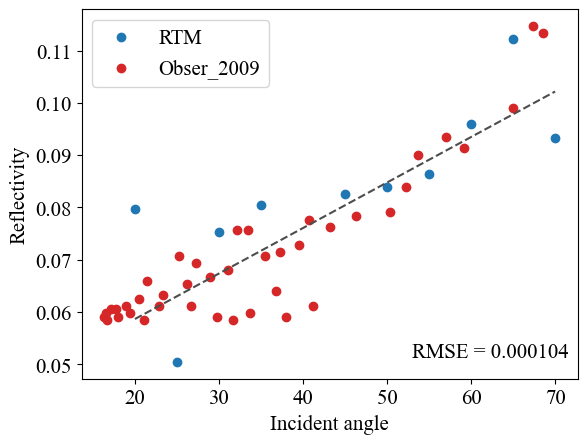

In [592]:
fig, ax = plt.subplots()
# F = 1, all diffuse reflectivity on the 
# 2009, rhp=0.085, my rho = 0.0544
#plt.scatter(ANGLE, np.array(REFLEC), color = "C0", label = "RTM_reflec")
#plt.scatter(61.8, (1-rtm_solar-0.06-0.38), s = 50, color = "C3", label = "RTM_solar")
#plt.plot(np.degrees(theta), ttt,color="C0",label="RTM_onlysur")

ax.scatter(ANGLE[:-1], total_reflect[:-1], color = "C0", label = "RTM")
ax.scatter(x,y,label="Obser_2009",color="C3")
ax.plot(xp,yp, ls="--", c=".3", alpha=1)
ax.annotate(f"RMSE = {rmse:.3}", (53, 0.053),color="k",
            textcoords="offset points", xytext=(1 * 0.15, -6))
ax.set_ylabel('Reflectivity',fontsize=font,family=fontfml)
ax.set_xlabel('Incident angle',fontsize=font,family=fontfml)

plt.legend()
fig_dir = "../figure/"
fig.savefig(fig_dir+'validation.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

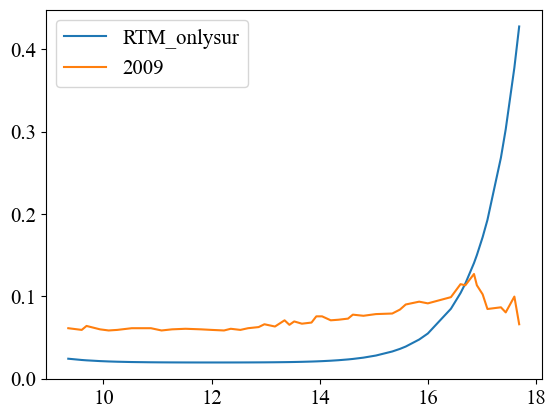

In [280]:
temp1 = R * F_dw_os[:, np.newaxis]
perct = np.zeros(len(theta))
for i in range(len(theta)):
    perct[i] = integrate.trapz(temp1[:, i], lam) * 1000
ttt= (perct/ I1)

plt.plot(df["solar_time"].values, ttt,color="C0",label="RTM_onlysur")

plt.plot(df["solar_time"],df["reflectivity"],label="2009",color="C1")
plt.legend()
plt.show()

In [372]:
(5250 * 4 + 180.75)

21180.75

In [479]:
np.arange(25,80,10)

array([25, 35, 45, 55, 65, 75])